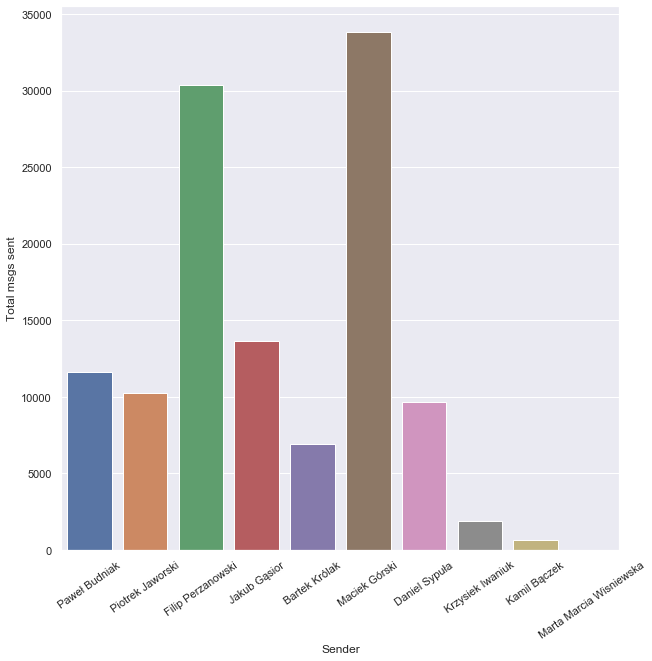

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import stats
import pandas as pd
import seaborn as sns

json_chat = 'skladczarnuchow.json'


chat = stats.load_json(json_chat)
#chat = stats.load_from_path(R'D:\facebook html i json\DanielSypula_cJS-IpkT2A')
msg_stats = stats.get_msg_stats(chat)
df = pd.DataFrame(((k,*v) for k,v in msg_stats.items()))
df.columns = ['Sender', 'Total msgs sent', 'Avg msg length', 'Total chars sent']
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.barplot(x='Sender', y='Total msgs sent', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation =35)
ax

## Znaki wysłane razem

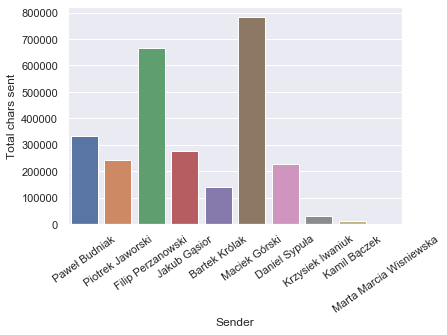

In [2]:
bar = sns.barplot(x='Sender', y='Total chars sent', data = df)
bar.set_xticklabels(bar.get_xticklabels(), rotation =35)
plt.show()

## Znaki na wiadomość

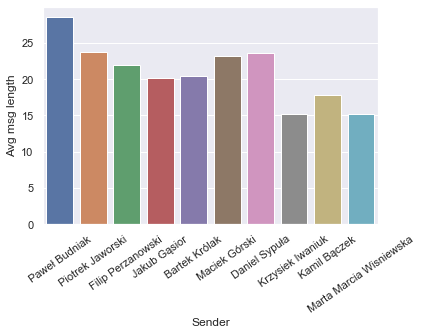

In [3]:
bar2 = sns.barplot(x='Sender', y='Avg msg length', data = df)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation =35)
plt.show()

## Licznik wyrazów
Poniżej można zmienić minimalną długość słowa.

In [4]:
#ksywy = ['debesciak', 'pierdziano', 'czlowiek', 'wielkiego', 'szacunku', 'glawiator', 'tajtisów', 'klawy', 'ziom3q']
word_counts = stats.get_word_counts(chat, filter_participants_names = True, exclude_words = None)
min_word_length = 5 #minimalna długość wyrazu
word_counts_filtered = {}
for sender in word_counts:
    word_counts_filtered[sender] = {k:v for k,v in word_counts[sender].items() if len(k)>=min_word_length}
#remove dictionaries emptied by the above filter:
word_counts_filtered = {k:v for k,v in word_counts_filtered.items() if v}

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0, flags=flags)


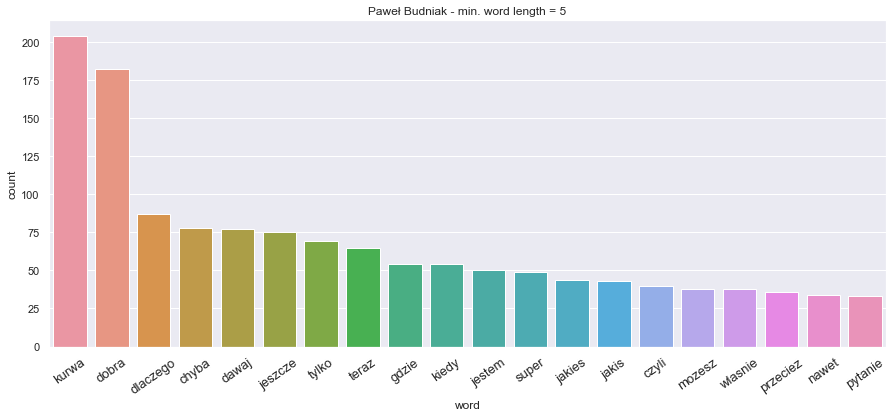

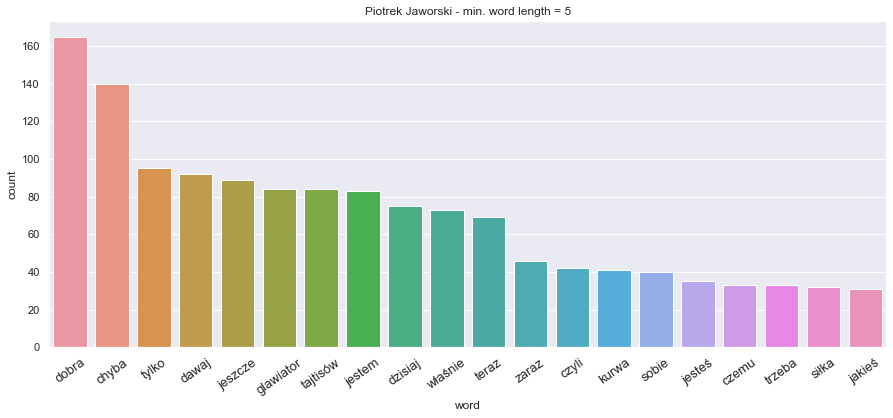

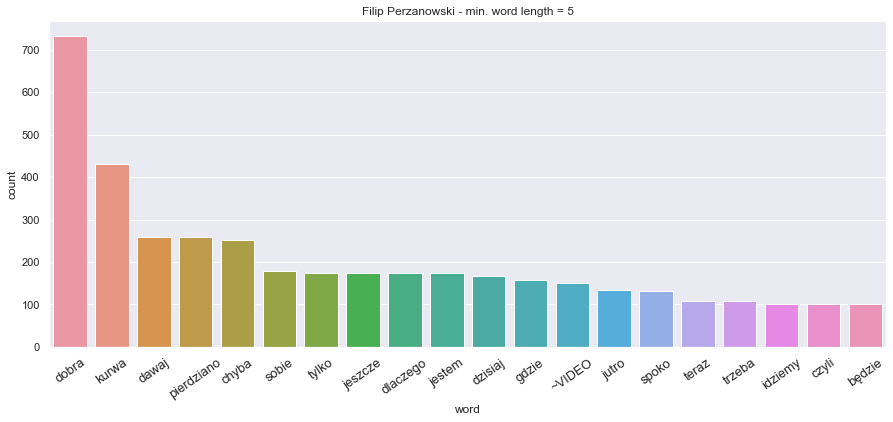

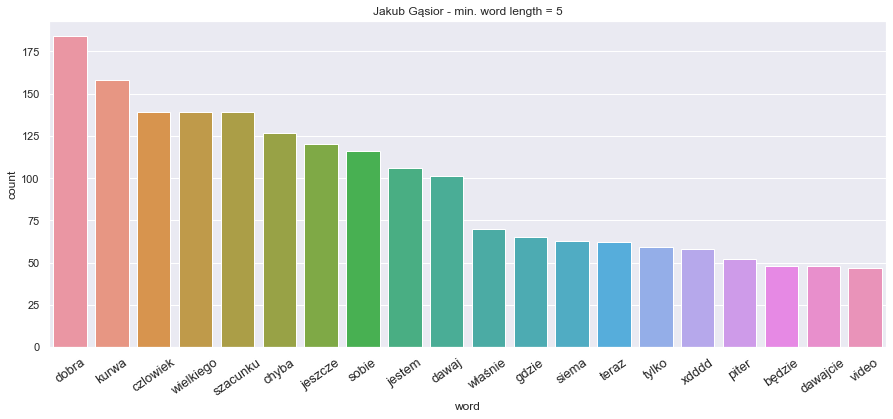

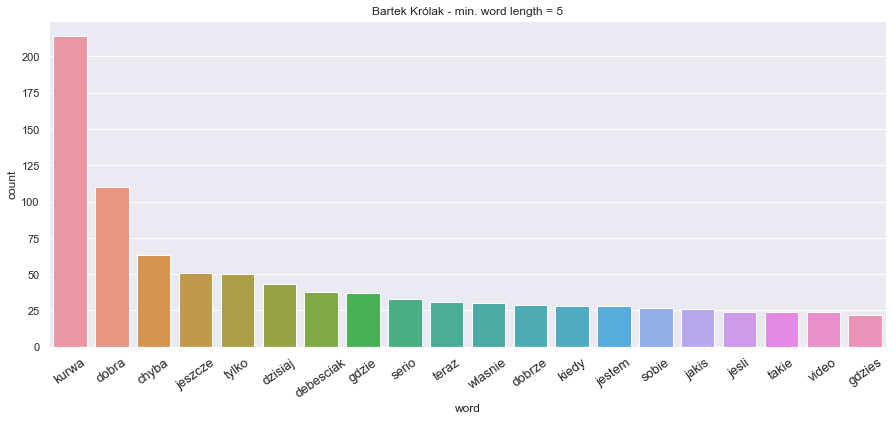

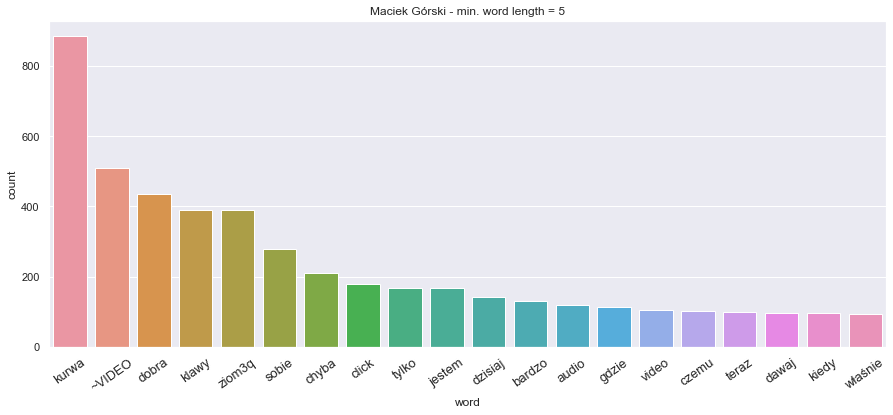

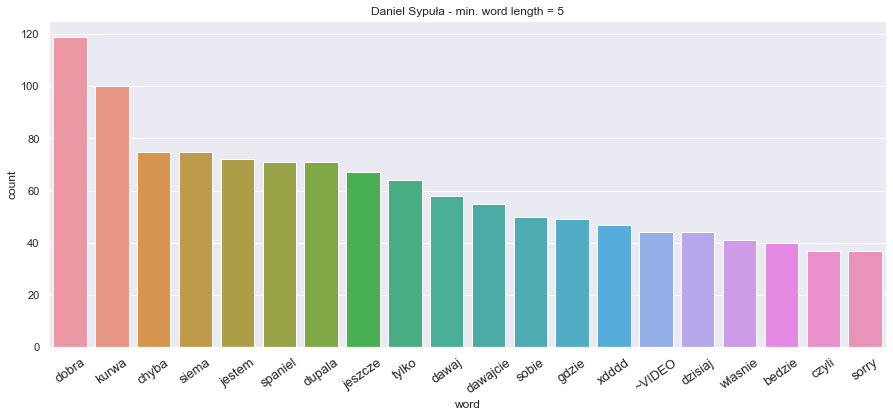

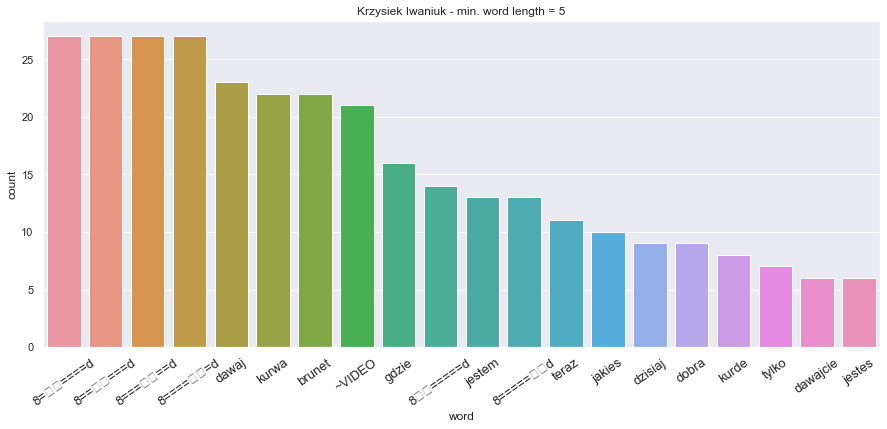

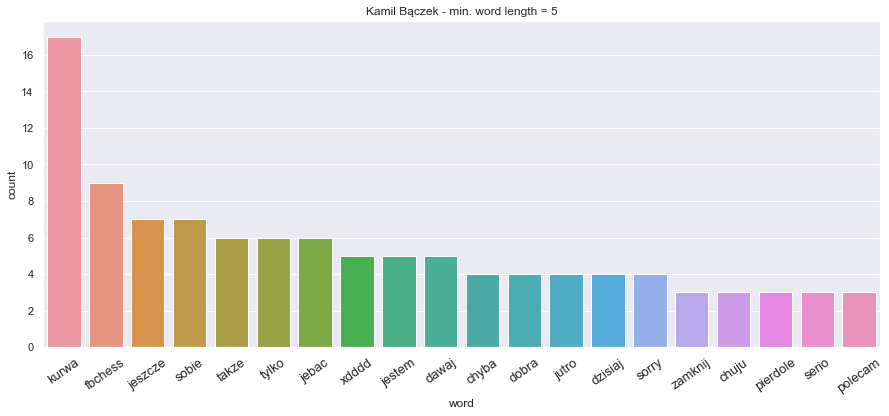

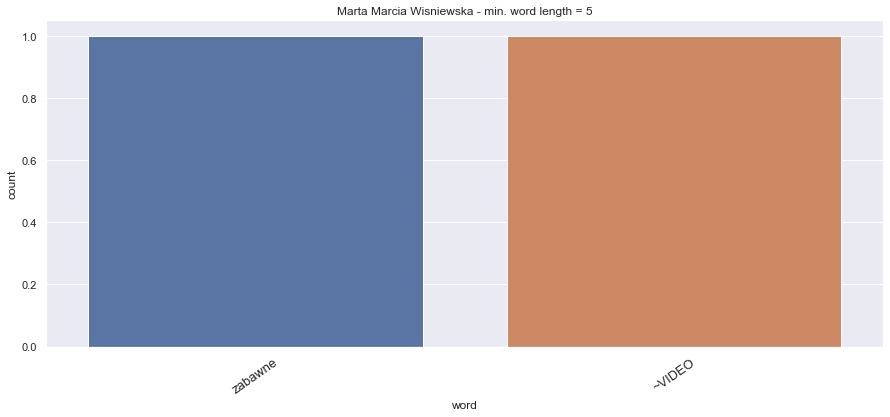

In [5]:
#plt.rcParams.update({'font.size': 30})
sns.set(rc={'figure.figsize':(15,6)})
plt.rc('xtick', labelsize=13)
for i,sender in enumerate(word_counts_filtered):
    df = pd.DataFrame(word_counts_filtered[sender].items())
    df.columns = ['word', 'count']
    plt.figure(i)
    ax = sns.barplot(y='count', x='word', data=df[0:20])
    ax.set_xticklabels(ax.get_xticklabels(), rotation =35)
    ax.set_title(f'{sender} - min. word length = {min_word_length}')


In [6]:
kurwas = stats.get_kurwa_coefficients(word_counts, msg_stats)
#ignore_index = True w pandas 1.0.0
df = pd.DataFrame(kurwas.items(), columns = ['Sender', 'kurwas per msg']).sort_values(by='kurwas per msg', ascending=False)
df

,Sender,kurwas per msg
4,Bartek Królak,3.1%
5,Maciek Górski,2.6%
8,Kamil Bączek,2.6%
0,Paweł Budniak,1.8%
2,Filip Perzanowski,1.4%
3,Jakub Gąsior,1.2%
7,Krzysiek Iwaniuk,1.2%
6,Daniel Sypuła,1.0%
1,Piotrek Jaworski,0.4%


In [7]:
word_counts_filtered[]

SyntaxError: invalid syntax (<ipython-input-7-2fade7b42214>, line 1)